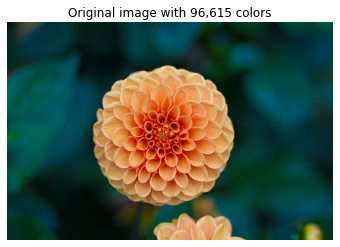

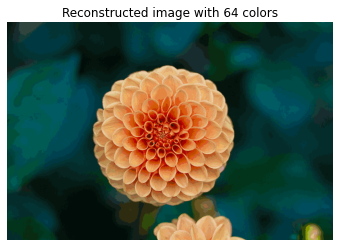

In [ ]:
#Source Code: https://github.com/marcopeix/ISL-Unsupervised/blob/master/Unsupervised%20Learning.ipynb

#importing classes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

#loading image
flower = load_sample_image('flower.jpg')

flower = np.array(flower, dtype=np.float64) / 255

plt.imshow(flower)

#image becomes 2d matrix for manipulation
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

#Determines centroid location so results are reproducible
image_sample = shuffle(image_array, random_state=42)[:1000]

#Fit Kmeans
n_colors = 64
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)

#Get color indices for full image
labels = kmeans.predict(image_array)

#Function to reconstruct image with new colors
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

#displays original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96,615 colors')
plt.imshow(flower)

#displays new image
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))



Explained variance ratio from PCA: [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of IRIS dataset')

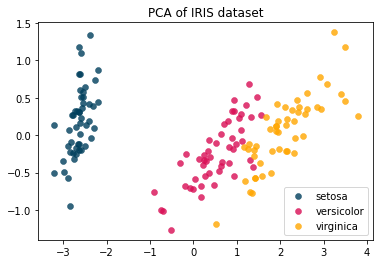

In [ ]:
#Source Code: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#loads the dataset named iris
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

#Runs PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

#Prints principal component values
print('Explained variance ratio from PCA: {}'.format(pca.explained_variance_ratio_))

#Colors to label different targets
colors = ['#003f5c', '#d90e55', '#ffa600']

#Size of points
lw = 0.5

#Sets up plot
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

#Creates Legend and Title
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In [1]:
#Source Code: https://github.com/mariahsonja/machine-learning/blob/main/unsupervised-learning/apriori-assossiation.ipynb

# installing apriori
!pip install apyori
# importing packages & libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

# reading data 
# data source: https://drive.google.com/file/d/1y5DYn0dGoSbC22xowBq2d4po6h1JxcTQ/view
data = pd.read_csv('/content/store_data.csv', header=None)

# checking first rows
data.head()

#data.info()

# converting df to a list of lists
records = []
for i in range(0, 7501):
    records.append([str(data.values[i,j]) for j in range(0, 20)])

records[:1]

# creating model
rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
results = list(rules)

# printing results
results[:1]

# making it more readable
for item in results:
    assoc = item[0] 
    items = [x for x in assoc]
    print('Rule: ' + items[0] + ' & ' + items[1])
    print('Support: ' + str(item[1]))
    print('Confidence: ' + str(item[2][0][2]))
    print('Lift: ' + str(item[2][0][3]),'\n')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=f5fd90d2dbae8dc22cac704f589830b2203b0e3e213fb28c59b8fa140ed094b3
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


FileNotFoundError: ignored